In [2]:
import seaborn as sns


In [ ]:
# ================================
# Diabetes Prediction - EDA
# ================================

# 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("Diabetes.csv")  
print("Data Preview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Data Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glu

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())

cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

print("\nMissing values handled.")



Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values handled.


In [ ]:
# Check categorical variables
print("Categorical Columns:", df.select_dtypes(exclude=np.number).columns.tolist())
df["Outcome"] = df["Outcome"].astype("category")

print(df["Outcome"].value_counts())


Categorical Columns: []
Outcome
0    500
1    268
Name: count, dtype: int64


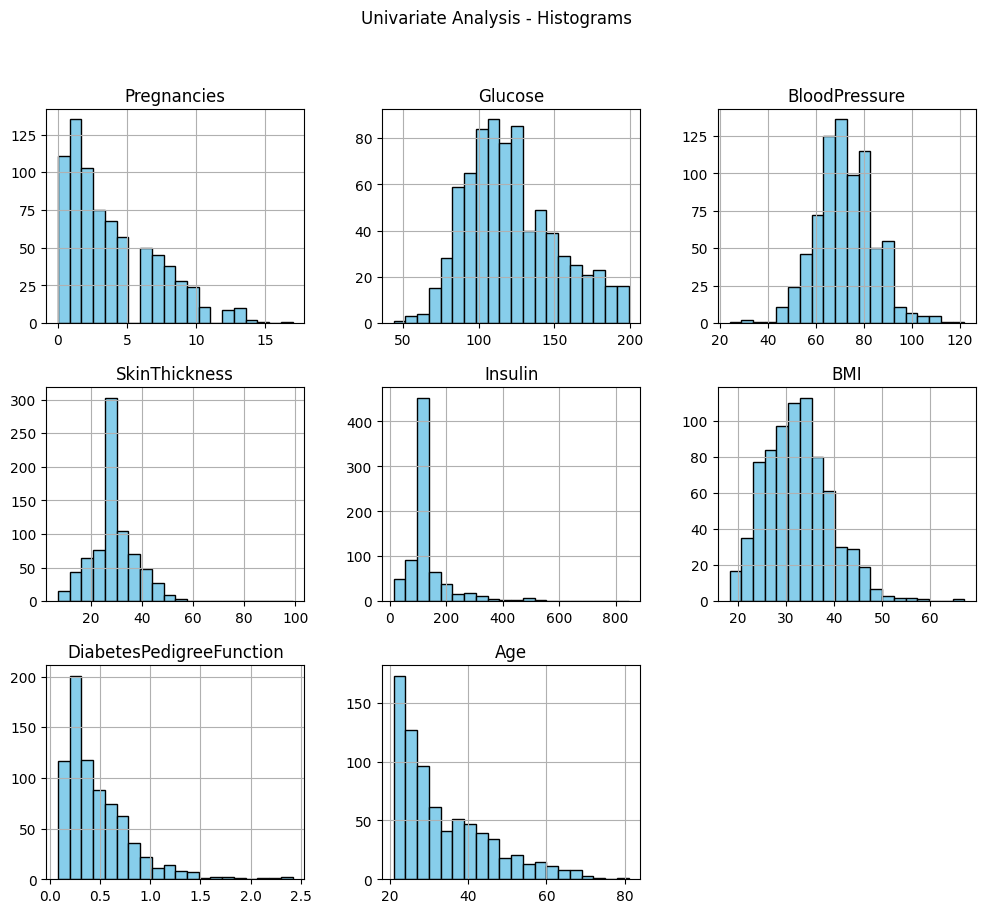

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\2588260491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


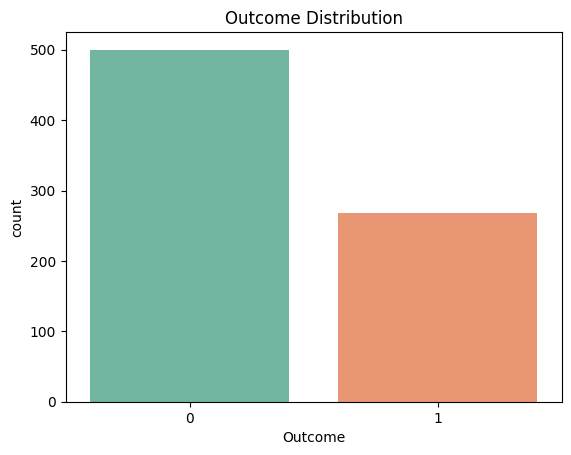

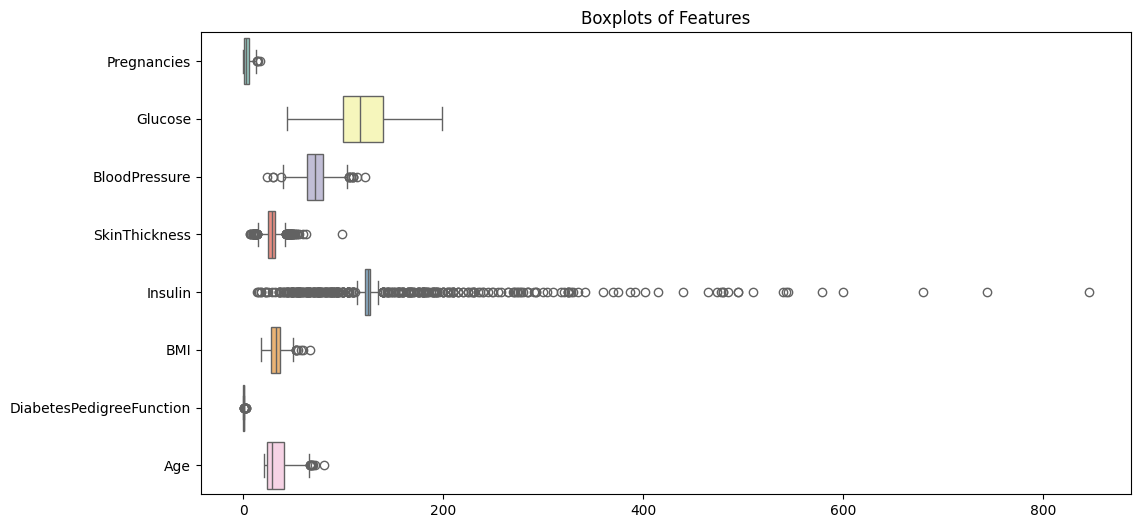

In [6]:
# Histograms for numerical features
df.hist(bins=20, figsize=(12, 10), color="skyblue", edgecolor="black")
plt.suptitle("Univariate Analysis - Histograms")
plt.show()

# Countplot for Outcome
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Outcome Distribution")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set3")
plt.title("Boxplots of Features")
plt.show()


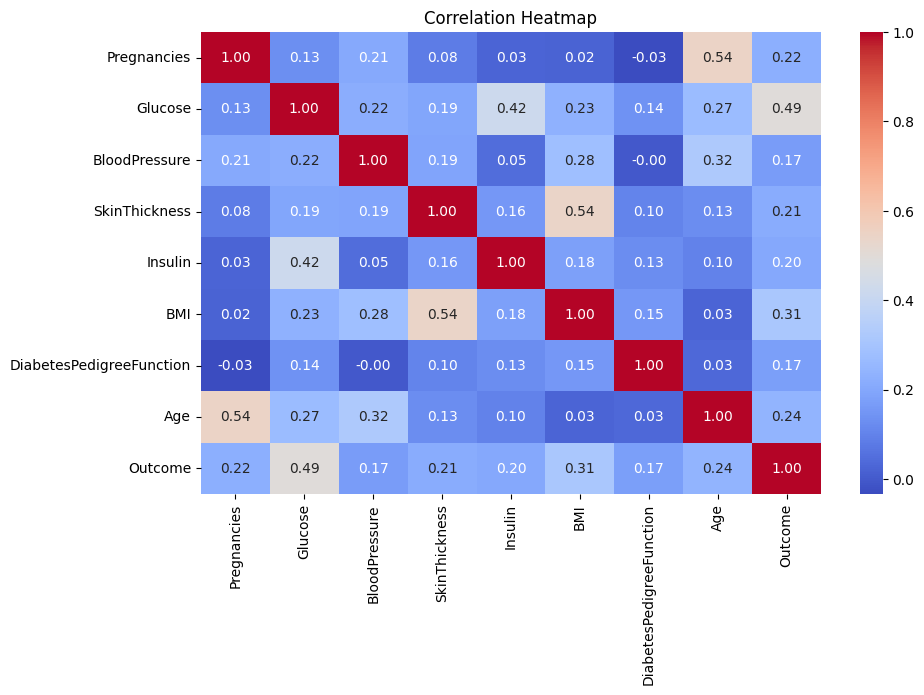

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


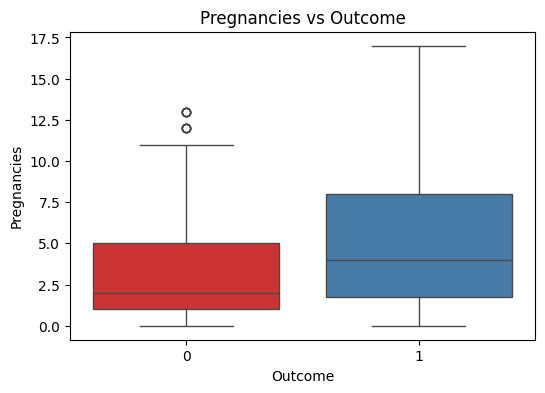

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


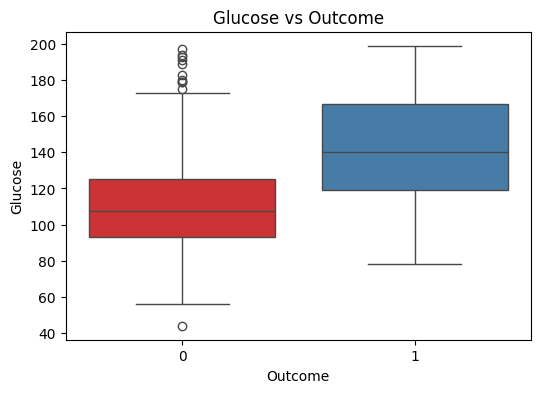

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


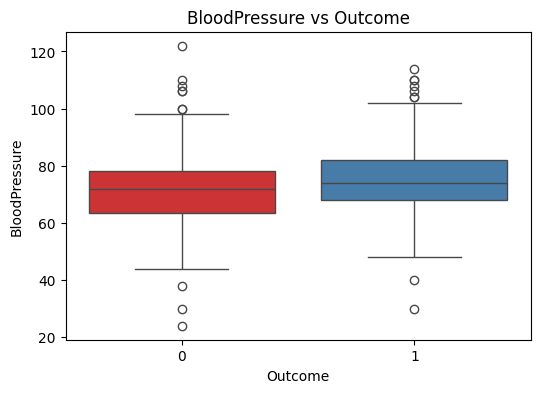

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


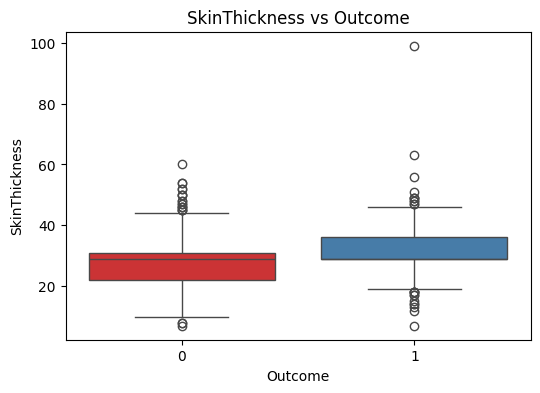

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


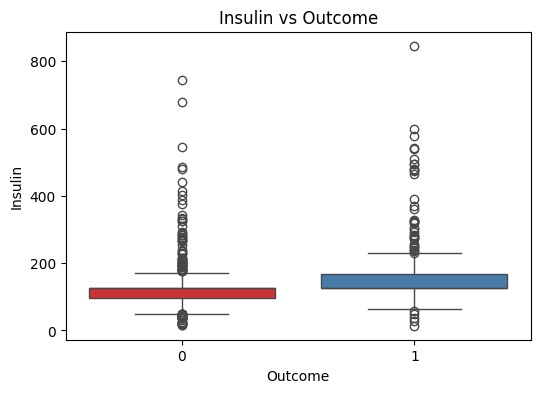

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


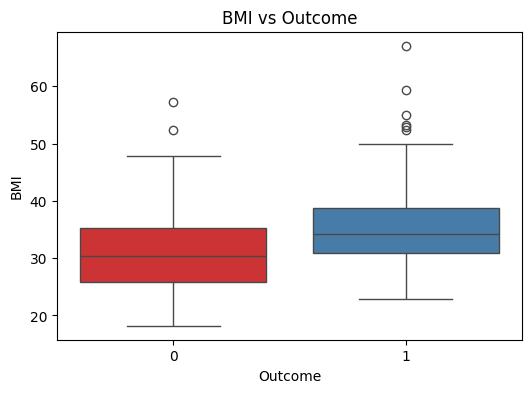

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


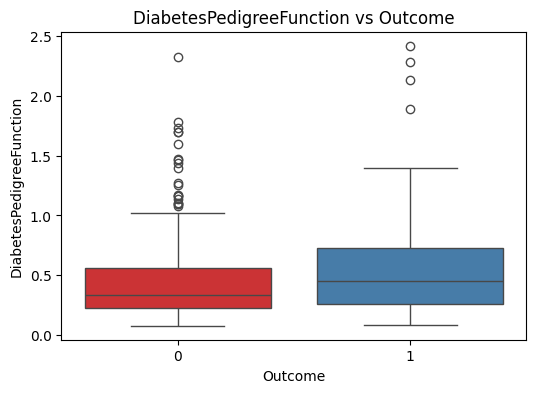

C:\Users\DELL\AppData\Local\Temp\ipykernel_30904\3219595922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")


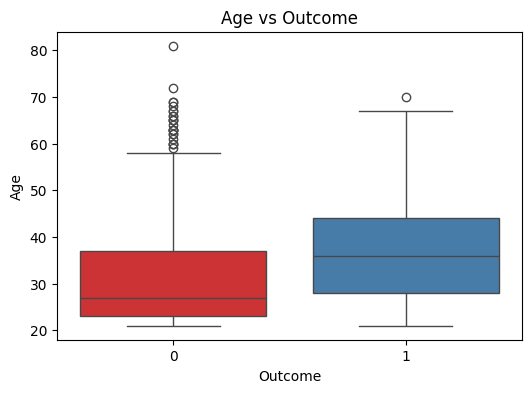

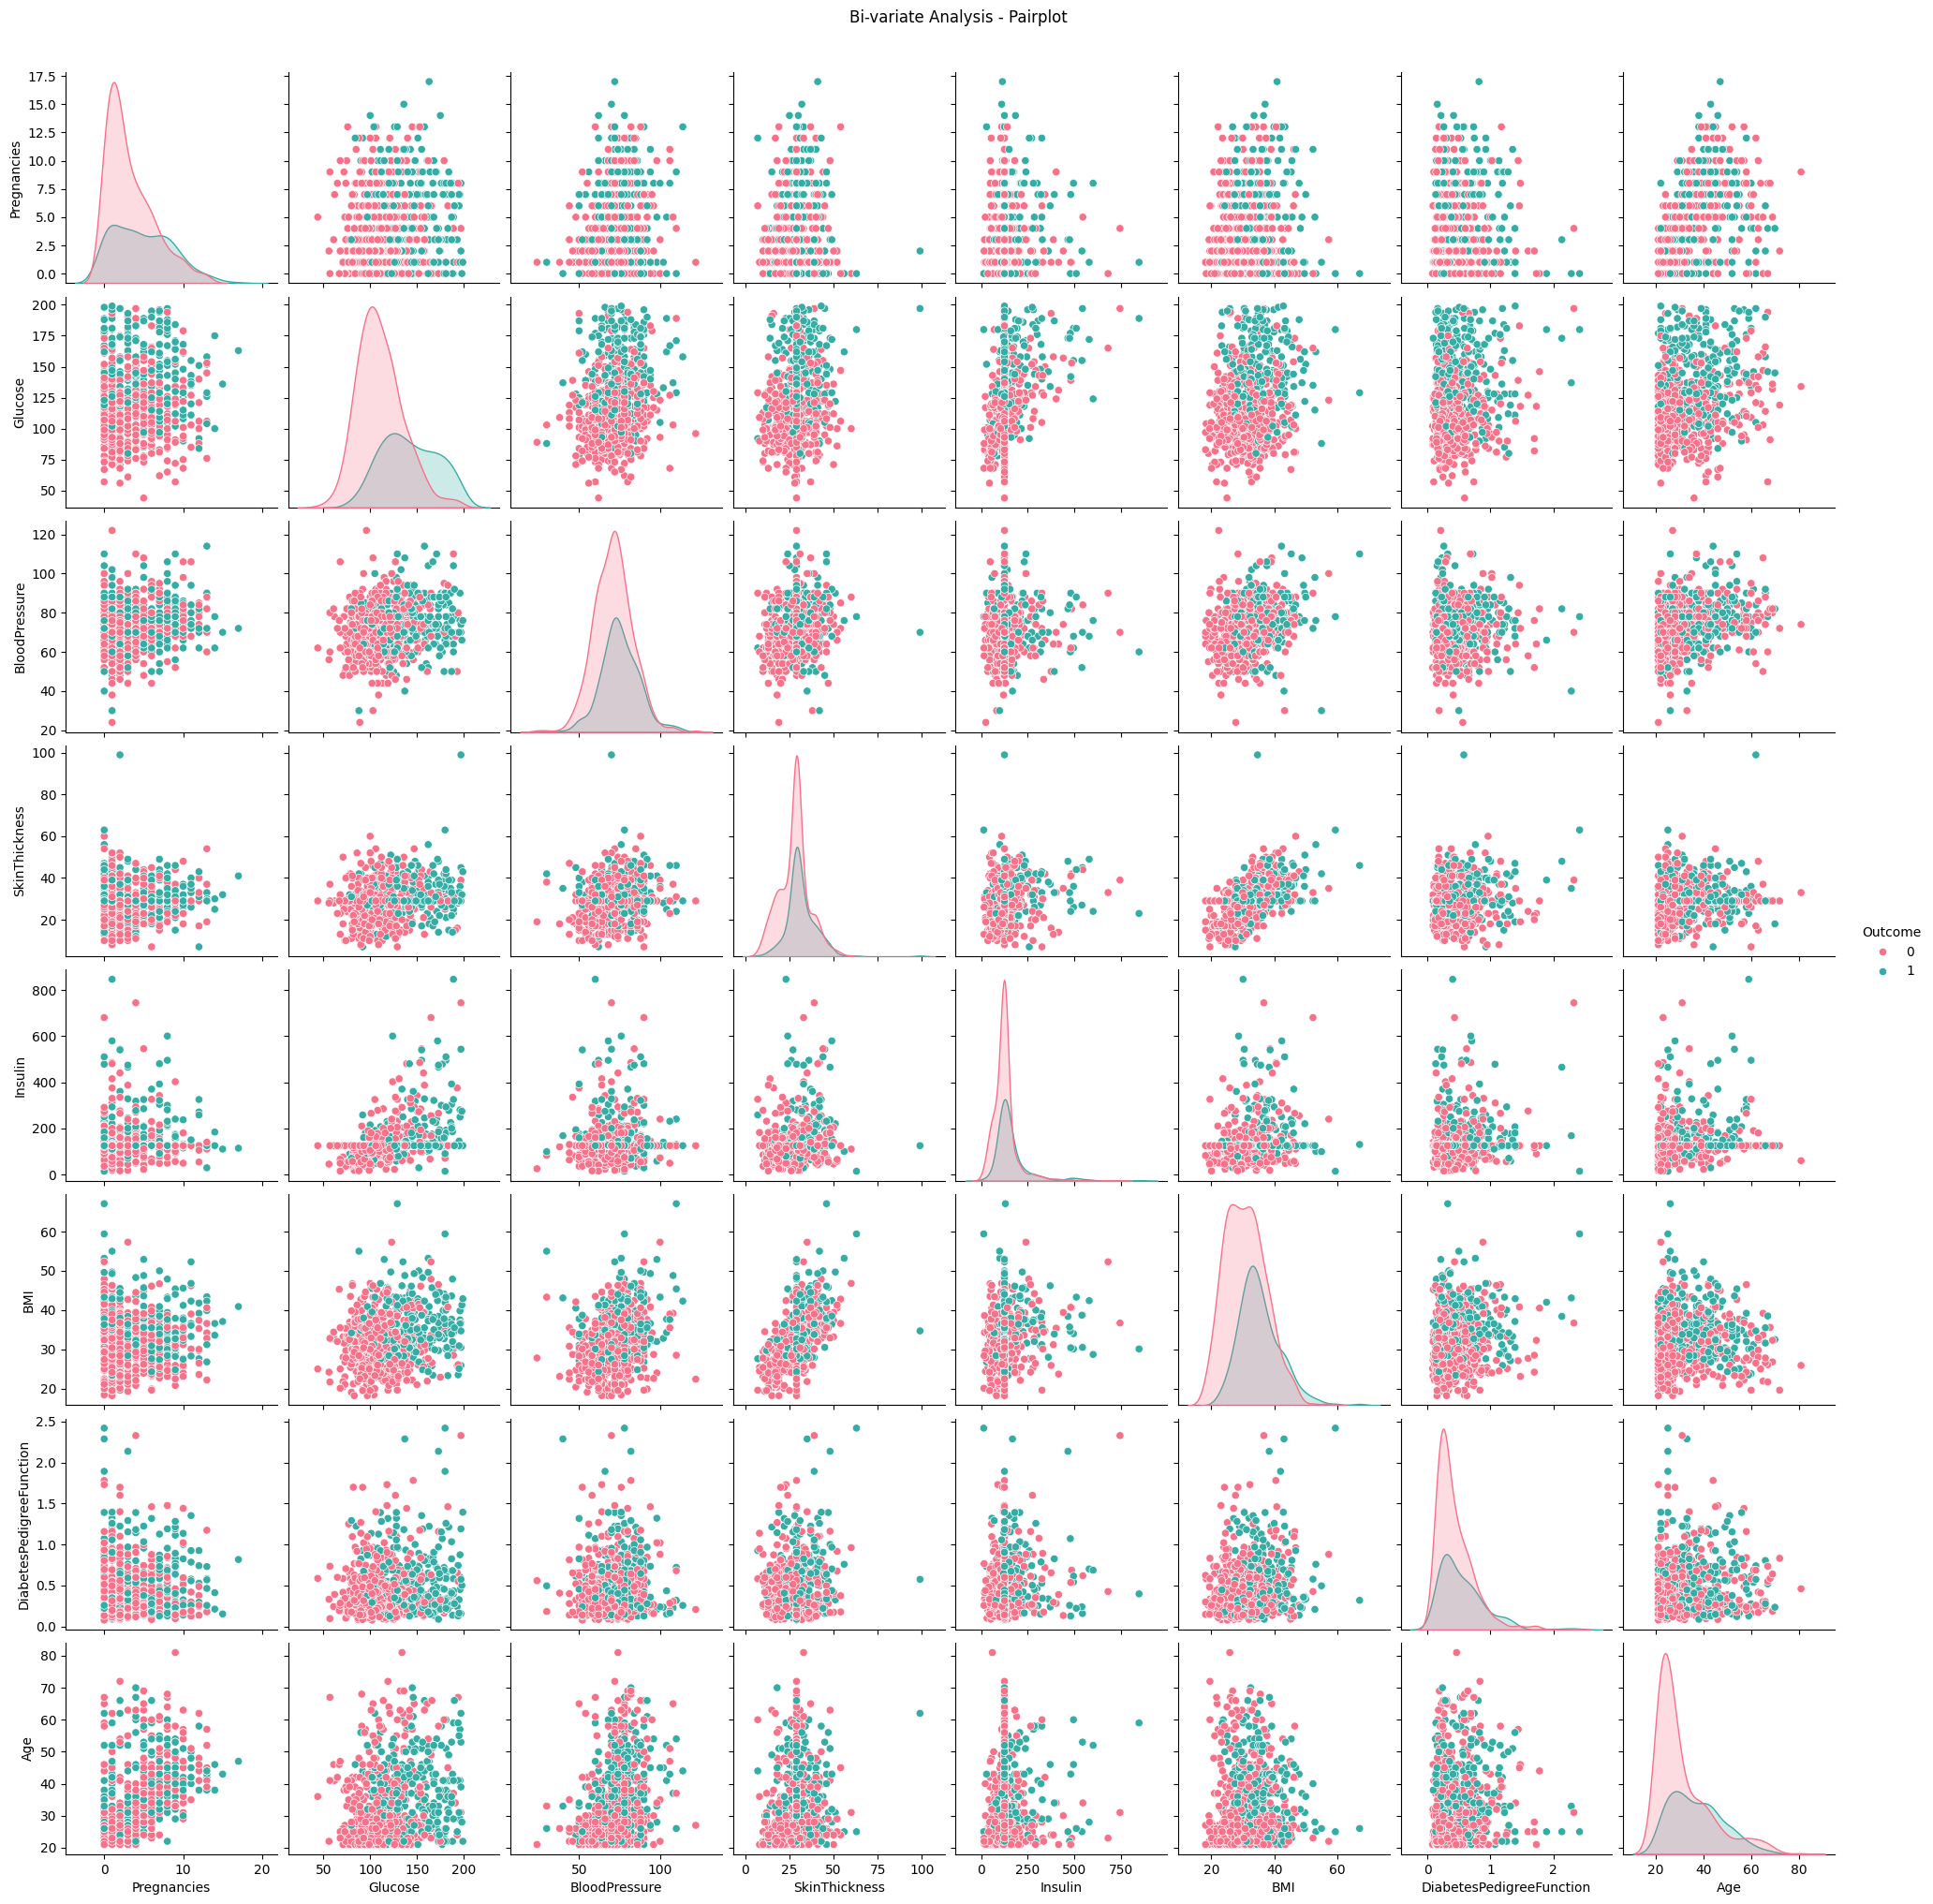

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Outcome vs numerical features
for col in df.select_dtypes(include=np.number).columns:
    if col != "Outcome":
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="Outcome", y=col, data=df, palette="Set1")
        plt.title(f"{col} vs Outcome")
        plt.show()

# Pairplot
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="husl")
plt.suptitle("Bi-variate Analysis - Pairplot", y=1.02)
plt.show()
